In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df = pd.read_csv('gender_submission.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

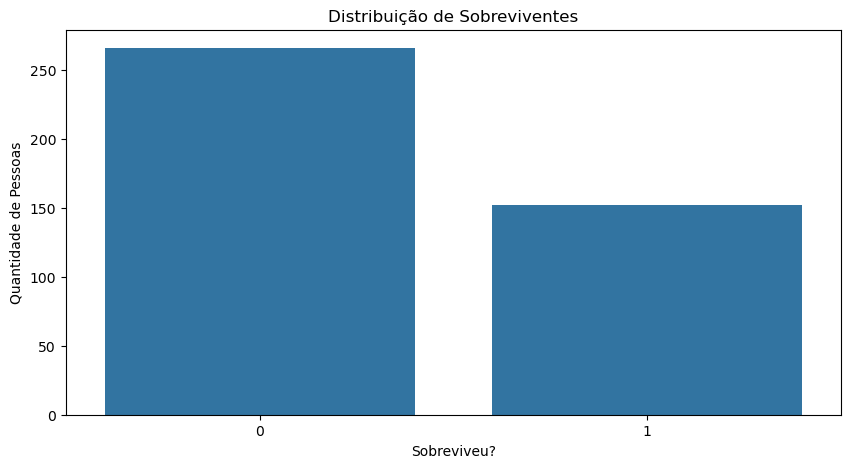

In [53]:


plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=df)
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Sobreviveu?')
plt.ylabel('Quantidade de Pessoas')
plt.show()

In [54]:
df_train = pd.read_csv('train.csv')
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Digamos que queremos juntas os dois dataframes, o df - que possui o ID do passageiro e se sobreviveu ou não -
com o df_train - que possui os demais dados dos passageiros. Como eles possuem uma coluan em comum, 'PassengerId', podemos
usar essa coluna para juntar os dois dataframes, como abaixo. 
No entando, já temos essas informações no dataframe df_train, então não precisamos fazer essa junção :)

In [56]:

# merged_df = pd.merge(df_train, df, on='PassengerId', how='left')
# merged_df.columns

In [57]:
# Filtra as linhas do DataFrame para selecionar apenas os registros com 'Sex' igual a 'male' e conta quantos homens há
total_homens = df_train[df_train['Sex'] == 'male'].shape[0]

# Filtra as linhas para selecionar os homens que sobreviveram (coluna 'Survived_x' igual a 1) e conta quantos são
homens_sobreviventes = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].shape[0]

# Calcula a porcentagem de homens sobreviventes dividindo o número de homens sobreviventes pelo total de homens e multiplicando por 100
porcentagem_homens_sobreviventes = homens_sobreviventes / total_homens * 100

print(f'Porcentagem de homens que sobreviveram: {porcentagem_homens_sobreviventes:.2f}%')

Porcentagem de homens que sobreviveram: 18.89%


In [58]:
a, b = df_train.groupby('Sex')['Survived'].mean()*100
print(f'Porcentagem que sobreviveram por sexo\nHomens:{b:.2f}% \nMulheres:{a:.2f}%')

Porcentagem que sobreviveram por sexo
Homens:18.89% 
Mulheres:74.20%


Analise de Sobrevivencia por classe (Pclass)

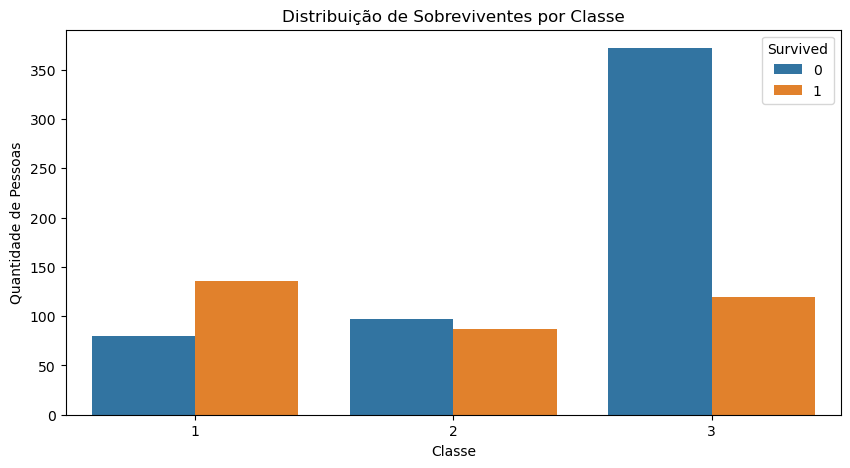

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x = 'Pclass', hue = 'Survived')
plt.title('Distribuição de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Pessoas')
plt.show()

Analise de sobrevivencia por sexo x Classe

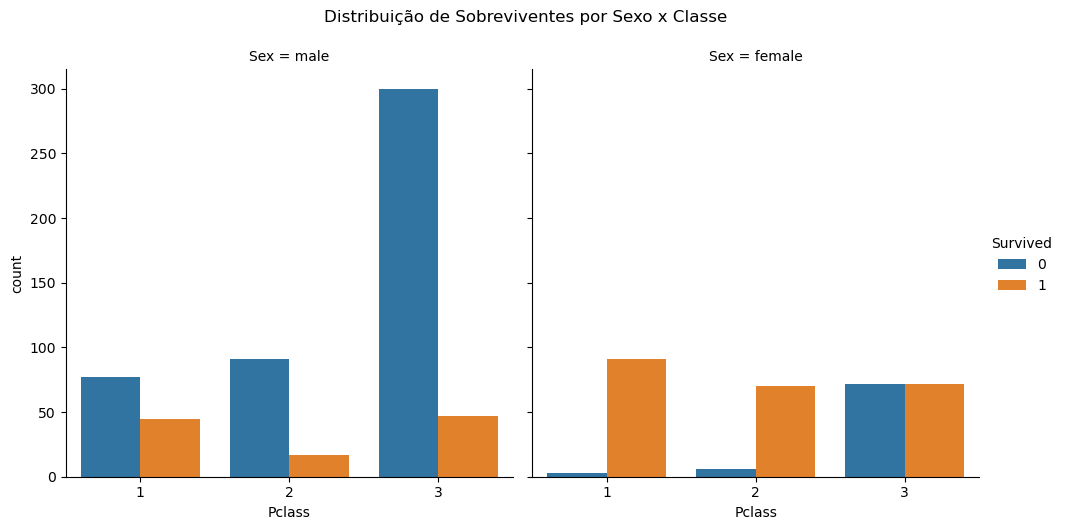

In [60]:
g = sns.catplot(
    data=df_train,
    x='Pclass',
    hue='Survived',
    col='Sex',
    kind='count',
    height=5,
    aspect=1
)
g.fig.suptitle('Distribuição de Sobreviventes por Sexo x Classe', y=1.05)
plt.show()

Analise de sobrevivencia por Idade

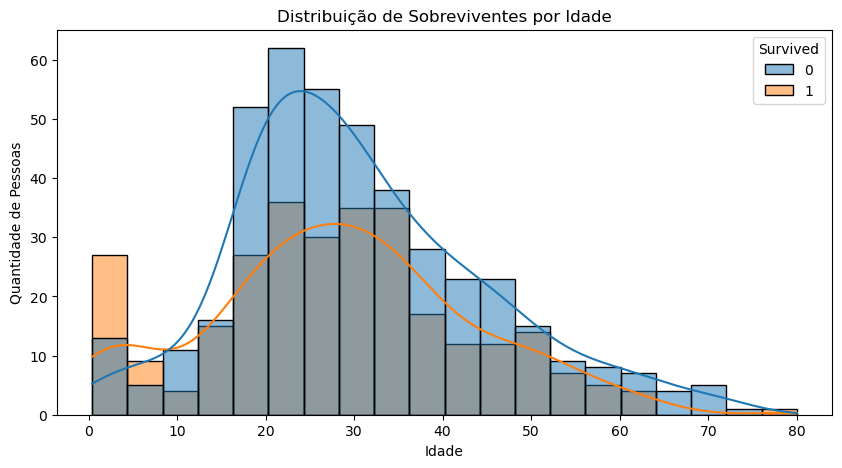

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True)
plt.title('Distribuição de Sobreviventes por Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pessoas')
plt.show()

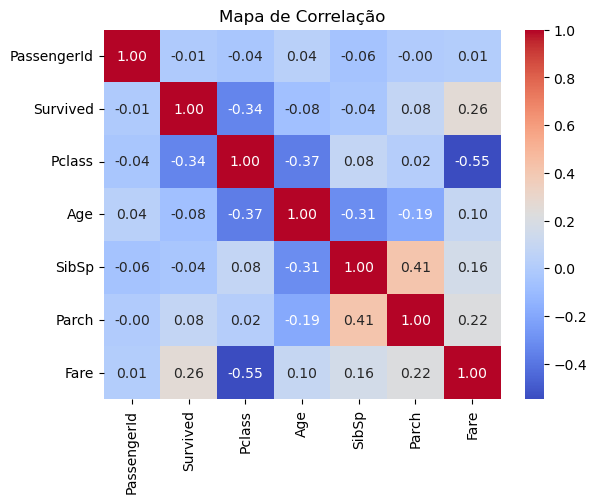

In [65]:
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()